# Chapter 4: Structural Causal Models (SCMs)

## Key Points Learned in this Chapter:

### 1. Introduction to Structural Causal Models 
* Define SCMs and explain their importance in causal inference.
### 2. Graphs vs. Structural Equations
* understand when to use graphical models vs. SCMs.
### 3. Interventions in SCMs
* how to model interventions using SCMs.
### 4. Counterfactuals and SCMs
* Show how SCMs handle counterfactual reasoning.


---

## 1. Introduction to Structural Causal Models (SCMs)

Structural Causal Models (SCMs) are a framework for expressing and analyzing causal relationships between variables using both graphs (DAGs) and structural equations. The main advantage of SCMs is that they allow not only for understanding causal structures but also for simulating and predicting outcomes under hypothetical scenarios, such as interventions or counterfactuals.

**Why SCMs are Important**: 

Unlike purely statistical models that show correlations between variables, SCMs explicitly model cause-and-effect relationships. This allows for reasoning about "what-if" scenarios and understanding the underlying mechanisms driving observed data.

### Components of SCMs:

- **Variables**:
  - **Endogenous variables** ($X_1, X_2, ..., X_n$): These are the internal variables of interest in the system. Their values depend on other variables within the system, as well as potentially external factors.
  - **Exogenous variables** ($U_1, U_2, ..., U_n$): These are external factors that are not explicitly modeled but influence the endogenous variables.
    
</br>
  
- **Structural Equations**: These equations describe how each endogenous variable depends on its parent variables (those that causally influence it) and any relevant exogenous variables.
- For example: $ X_2 = f(X_1, U_2) $ This equation expresses that $X_2$ is a function of $X_1$ and $U_2$ (where $U_2$ is an exogenous influence).
  
</br>

> #### Proposition 4.1. SCM Entailed Distributions:
>
> An SCM $\mathfrak{C}$ defines a unique distribution over the variables $X = (X_1,...,X_J)$ such that:
> 
> $ X_j = f_{X_j}(Pa(X_j), U_{X_j}) $  for $j = 1,...,J$
> 
> We refer to it as the entailed distribution $P^\mathfrak{C}_X$ and sometimes write $P_X$.

</br>

### Example: Study Habits and Exam Scores

Imagine a system modeling how study habits affect exam scores, while both are influenced by intelligence and random luck. The endogenous variables are:
- $X_1$: Hours studied.
- $X_2$: Exam score.

The exogenous variables include:
- $U_1$: Intelligence (latent, unobserved).
- $U_2$: Luck (random, unobserved).

The structural equations may look like this:
- $X_1 = f(U_1)$ (hours studied depend on intelligence).
- $X_2 = g(X_1, U_2)$ (exam score depends on hours studied and luck).


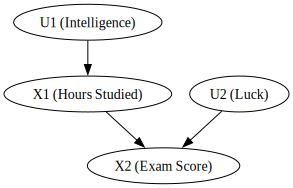

In [63]:
import graphviz as gr

# Create the DAG using Graphviz
dag = gr.Digraph()

# Add nodes (variables)
dag.node("U1", "U1 (Intelligence)")
dag.node("X1", "X1 (Hours Studied)")
dag.node("U2", "U2 (Luck)")
dag.node("X2", "X2 (Exam Score)")

# Add edges (causal relationships)
dag.edge("U1", "X1")  # Intelligence affects hours studied
dag.edge("X1", "X2")  # Hours studied affect exam score
dag.edge("U2", "X2")  # Luck affects exam score

# Render the DAG
dag



---

## Structural Equation Models (SEM) vs Structural Causal Models (SCMs)

* SEM is a statistical technique used to analyze the relationships between multiple variables by modeling the system with linear or nonlinear equations. SEM is often used to estimate causal relationships between variables when data is observational, and traditional experimental manipulation is not feasible.

* SCMs can be seen as an extension of SEMs, where the structural equations explicitly model the causal relationships and interventions. SEMs focus more on estimating relationships, whereas SCMs allow for simulating the impact of interventions and exploring counterfactuals.

In SEMs, relationships between variables are typically expressed through linear equations, though nonlinear SEMs are also possible.

### Example: Income vs. Education Level

Consider a SEM analyzing the relationship between income ($X_1$), education level ($X_2$), and job performance ($Y$). We might model it as:

$ Y = \beta_1 X_1 + \beta_2 X_2 + \epsilon $

Where:

$Y$ represents job performance,
$X_1$ represents income,
$X_2$ represents education level,
$\beta_1$ and $\beta_2$ are the coefficients capturing the effects of income and education on job performance, respectively,
$\epsilon$ is the error term representing unmeasured or random influences on job performance (e.g., motivation or luck).

This model allows us to understand how variations in income and education affect job performance, but it does not yet allow for causal reasoning about interventions (e.g., "What happens if we increase education by 2 years?"). For that, we turn to SCMs.


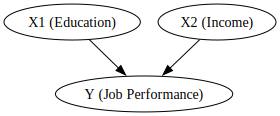

In [65]:
import graphviz as gr

# Create the DAG using Graphviz
dag = gr.Digraph()

# Add nodes (variables)
dag.node("X1", "X1 (Education)")
dag.node("X2", "X2 (Income)")
dag.node("Y", "Y (Job Performance)")

# Add edges (causal relationships)
dag.edge("X1", "Y")  # Education affects Job Performance
dag.edge("X2", "Y")  # Income affects Job Performance

# Render the DAG
dag


#### Simulate Data and Calculate Regressions

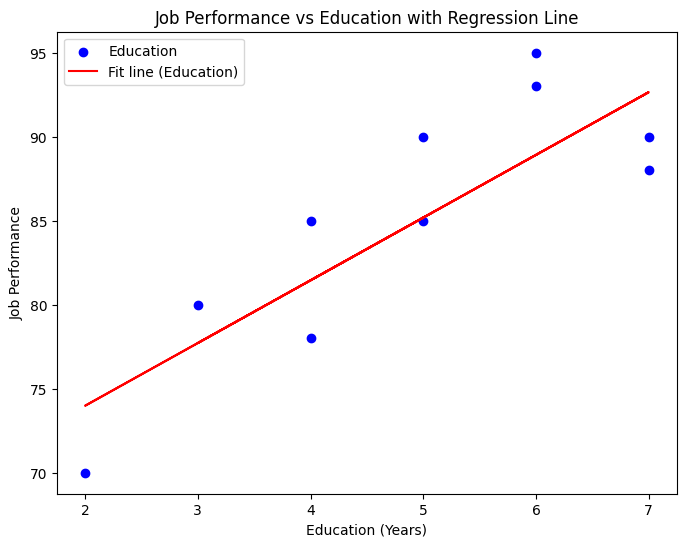

In [67]:
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt

# Expanded Example Data: Education (X1), Income (X2), Job Performance (Y) with 10 observations
X = np.array([[4, 3], [2, 1], [5, 4], [3, 2], [6, 5], [7, 6], [4, 3], [6, 4], [7, 5], [5, 4]])  # Education, Income
Y = np.array([85, 70, 90, 80, 95, 88, 78, 93, 90, 85])  # Job Performance

# Add a constant for the intercept in the regression model
X_with_const = sm.add_constant(X)

# Perform regression to model relationships (we are only interested in Education for plotting)
model = sm.OLS(Y, X_with_const)
results = model.fit()

# Plotting Job Performance vs Education with the regression line
plt.figure(figsize=(8, 6))

# Scatter plot of Job Performance vs Education
plt.scatter(X[:, 0], Y, label="Education", color="blue")

# Regression line for Education
plt.plot(X[:, 0], results.params[1] * X[:, 0] + results.params[0], color="red", label="Fit line (Education)")

# Labels and Title
plt.xlabel('Education (Years)')
plt.ylabel('Job Performance')
plt.title('Job Performance vs Education with Regression Line')
plt.legend()

# Show plot
plt.show()


---

## 2. Graphs vs. Structural Equations

A **Directed Acyclic Graph (DAG)** represents causal relationships as nodes (variables) and directed edges (arrows) that denote the flow of causality. DAGs are a powerful tool for visualizing the structure of causal relationships, but they don't specify the functional form of those relationships.

**Limitations of DAGs**:

- DAGs show the existence of relationships but not the strength or direction of effects. For example, a DAG might indicate that advertising affects sales, but it doesn't quantify how much an increase in advertising will change sales.
- DAGs also cannot easily represent latent variables or confounding factors unless explicitly included in the graph.


SCMs build on DAGs by introducing structural equations that specify how one variable influences another. These equations allow for simulating effects under interventions or counterfactuals.

**Key Advantage of SCMs**: 

Structural equations allow us to express causal relationships quantitatively. For example, if a DAG shows that $X_1$ (advertising) affects $X_2$ (sales), an SCM can specify that:

$ X_2 = f(X_1) = 2 \times X_1 + 50 $

This shows that for every additional unit of advertising, sales increase by 2 units, starting from a baseline of 50.


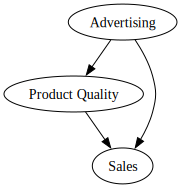

In [69]:
import graphviz as gr

# Create the DAG using Graphviz
dag = gr.Digraph()

# Add nodes (variables)
dag.node("Advertising", "Advertising")
dag.node("Product Quality", "Product Quality")
dag.node("Sales", "Sales")

# Add edges (causal relationships)
dag.edge("Advertising", "Product Quality")  # Advertising affects Product Quality
dag.edge("Advertising", "Sales")  # Advertising affects Sales
dag.edge("Product Quality", "Sales")  # Product Quality affects Sales

# Render the DAG
dag


---

## 3. Building an SCM: Causal Relationships as Equations

### How to Build an SCM:
1. Start with a DAG representing the causal structure of the system.
2. For each node (endogenous variable) in the DAG, write a structural equation that describes how the variable depends on its parents and any exogenous variables.
3. Ensure that each equation reflects the correct causal pathways. For example, if variable $X_2$ is influenced by $X_1$ and an exogenous factor $U_2$, the equation could be:

$ X_2 = f(X_1, U_2) $

### Key Steps:
1. **Identify variables**: Determine which variables are endogenous (e.g., sales, product quality) and which are exogenous (e.g., market conditions).
2. **Define causal relationships**: Decide how each endogenous variable depends on its causes (parents).
3. **Write equations**: For each variable, create a structural equation based on the causal relationships. Ensure that exogenous factors are included appropriately.
4. **Check consistency**: Ensure that the equations do not contradict the DAG.

### Example: Exercise Level Impact on Health

We are modeling a simple Structural Causal Model (SCM) for a healthcare system, where an individual's **exercise level ($X_1$)** influences their **health outcome ($Y$)**. Additionally, both the exercise level and the health outcome are affected by latent genetic factors ($U_1$ and $U_2$). These latent factors represent unobserved characteristics, such as motivation, physical ability, and genetic predisposition to health.

#### Structural equations:

$
\begin{cases}
 X_1 = f(U_1) = 0.7 \times U_1\\
 Y = g(X_1, U_2) = 0.5 \times X_1 + U_2
\end{cases}
$

Here, $X_1$ represents exercise level, $Y$ represents health, and $U_1$ and $U_2$ represent latent genetic factors.

- $X_1$ (exercise level) is determined by Latent Genetic Factor 1 ($U_1$). The constant 0.7 indicates that for every unit increase in $U_1$, the exercise level increases by 0.7 units.
- $Y$ (health outcome) is determined by both exercise level ($X_1$) and Latent Genetic Factor 2 ($U_2$). The constant 0.5 means that for every unit increase in exercise level, the health outcome increases by 0.5 units.

  

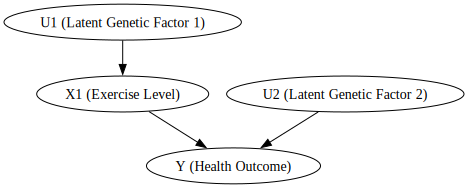

In [71]:
import graphviz as gr

# Create the DAG using Graphviz
dag = gr.Digraph()

# Add nodes (variables)
dag.node("U1", "U1 (Latent Genetic Factor 1)")
dag.node("X1", "X1 (Exercise Level)")
dag.node("U2", "U2 (Latent Genetic Factor 2)")
dag.node("Y", "Y (Health Outcome)")

# Add edges (causal relationships)
dag.edge("U1", "X1")  # Latent genetic factor 1 affects exercise level
dag.edge("X1", "Y")   # Exercise level affects health outcome
dag.edge("U2", "Y")   # Latent genetic factor 2 affects health outcome

# Render the DAG
dag


Let’s now simulate the system with specific values for the latent factors and explain the results:

In [73]:
# Define SCM equations using Python functions
def exercise(latent_genetic_factor):
    return 0.7 * latent_genetic_factor

def health(exercise_level, latent_genetic_factor):
    return 0.5 * exercise_level + latent_genetic_factor

# Example: Latent genetic factors
latent_genetic_factor_1 = 6
latent_genetic_factor_2 = 3

# Simulate the system
exercise_level = exercise(latent_genetic_factor_1)
health_outcome = health(exercise_level, latent_genetic_factor_2)

print("Exercise level:", exercise_level)
print("Health outcome:", health_outcome)


Exercise level: 4.199999999999999
Health outcome: 5.1


### Results Explanation:

The first equation calculates the **exercise level** ($X_1$) based on **Latent Genetic Factor 1** ($U_1$):

$$
X_1 = 0.7 \times U_1
$$

For $U_1 = 6$, the equation gives:

$$
X_1 = 0.7 \times 6 = 4.2
$$

So, the **exercise level** is 4.2, which is influenced by the value of $U_1$.


The second equation calculates the **health outcome** ($Y$) based on the **exercise level** ($X_1$) and **Latent Genetic Factor 2** ($U_2$):

$$
Y = 0.5 \times X_1 + U_2
$$

For $X_1 = 4.2$ and $U_2 = 3$, the equation gives:

$$
Y = 0.5 \times 4.2 + 3 = 2.1 + 3 = 5.1
$$

So, the **health outcome** is 5.1, taking into account both the exercise level and latent genetic factors.

### Range for Variables

- **Exercise Level ($X_1$)**: Since $X_1 = 0.7 \times U_1$, the range of $X_1$ depends on the range of $U_1$. If $U_1$ ranges from 0 to 10 (representing poor to excellent genetic predisposition), then $X_1$ will range from:

$$
X_1 = 0.7 \times 0 = 0 \quad \text{to} \quad X_1 = 0.7 \times 10 = 7
$$

Therefore, the **exercise level** can range from 0 to 7.

- **Health Outcome ($Y$)**: The health outcome is influenced by both $X_1$ and $U_2$. Assuming $U_2$ ranges from 0 to 10, the maximum value of $Y$ occurs when $X_1 = 7$ and $U_2 = 10$, and the minimum occurs when both $X_1 = 0$ and $U_2 = 0$. The range of $Y$ is:

$$
Y = 0.5 \times 0 + 0 = 0 \quad \text{to} \quad Y = 0.5 \times 7 + 10 = 3.5 + 10 = 13.5
$$

Therefore, the **health outcome** can range from 0 to 13.5.


---

### 4. Interventions in SCMs

#### Introduction to Interventions

* In SCMs (Structural Causal Models), **interventions** allow us to manipulate a specific variable, typically referred to as the **intervention** or **treatment**.
  
* Interventions are denoted as $do(T = t)$, which means setting a variable $T$ to a specific value $t$, regardless of its previous causes or natural behavior in the system. This manipulation cuts off the causal influence from its parents, allowing us to observe how this change affects other variables in the system.

For example, consider the following causal model $\mathfrak{C}$ where $T$ and $Y$ are influenced by $X$:

$$
\mathfrak{C}: \quad T := f_T(X, U_T), \quad Y := f_Y(X, T, U_Y)
$$

If we intervene on $T$ and set it to $t$, we obtain a new model $\tilde{\mathfrak{C}}$, where the structural equation for $T$ is replaced:

$$
\tilde{\mathfrak{C}}: \quad T := t, \quad Y := f_Y(X, t, U_Y)
$$

The **modularity assumption** ensures that only the equation for $T$ is changed, while the equation for $Y$ remains unaffected except that it now uses the fixed value of $T = t$. This is known as **autonomy**, where intervening on one variable leaves other mechanisms in the model intact.

Following is the DAG for 

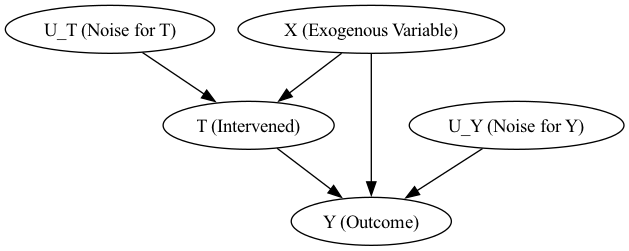

In [76]:
import graphviz as gr
from IPython.display import Image

# Create a DAG using Graphviz
dag = gr.Digraph()

# Add nodes (variables)
dag.node("X", "X (Exogenous Variable)")
dag.node("T", "T (Intervened)")
dag.node("Y", "Y (Outcome)")
dag.node("UT", "U_T (Noise for T)")
dag.node("UY", "U_Y (Noise for Y)")

# Add edges representing the causal relationships
dag.edge("X", "T")
dag.edge("X", "Y")
dag.edge("T", "Y")
dag.edge("UT", "T")
dag.edge("UY", "Y")

# Render the DAG to represent the causal model before intervention and display it
dag.render('causal_model_dag', format='png')
Image(filename='causal_model_dag.png')


### 4.2. Calculating Intervention Distributions 

This section is based on **Chapter 6** of the *Elements of Causal Inference* ([MIT Press](https://mitpress.mit.edu/9780262037310/elements-of-causal-inference/)).

When intervening on a variable $X_k$, we change the causal system, but not all distributions are affected. Using the **invariance statement**, we can calculate the intervention distribution in an SCM $\mathfrak{C}$, assuming that $X_j$ and $X_k$ are not directly connected ($k \neq j$). The parents of a node $X_j$ are denoted as $pa(j) := \mathbf{P A}_{j}^{\mathcal{G}}$, and the following equation holds:

$$
p^{\tilde{\mathfrak{C}}}\left(x_j \mid x_{pa(j)}\right) = p^{\mathfrak{C}}\left(x_j \mid x_{pa(j)}\right)
$$

Here, $\tilde{\mathfrak{C}}$ represents the modified SCM after intervening on $X_k$ (but not on $X_j$). This expresses the **autonomy** of the system, meaning that intervening on $X_k$ does not affect $X_j$ unless there is a direct causal link between them.

#### Structural Equations and the Markov Property

An SCM $\mathfrak{C}$ defines each variable by a **structural equation** as a function of its parents and some exogenous noise variable $U_j$. For example:

$$
X_j := f_j(X_{pa(j)}, U_j), \quad j = 1, \dots, d
$$

The **Markov property** allows us to decompose the joint distribution of the system into conditional distributions of each variable given its parents:

$$
p^{\mathfrak{C}}(x_1, \dots, x_d) = \prod_{j=1}^{d} p^{\mathfrak{C}}(x_j \mid x_{pa(j)})
$$

#### Performing an Intervention

After intervening on $X_k$, we modify the system such that the SCM evolves from $\mathfrak{C}$ to $\tilde{\mathfrak{C}}$. This intervention, denoted by $do(X_k := \tilde{U}_k)$, modifies the density from $p$ to $\tilde{p}$. Using the Markov property and invariance, we compute the new distribution as:

$$
p^{\mathfrak{C}; do(X_k := \tilde{U}_k)}(x_1, \dots, x_d) = \prod_{j \neq k} p^{\mathfrak{C}}(x_j \mid x_{pa(j)}) \cdot \tilde{p}(x_k)
$$

This equation shows that we can calculate the interventional distribution (left-hand side) using observational quantities (right-hand side), even without directly observing the intervention.

---

### Special Case of Interventions

When intervening on **source variables** (those without parents), conditioning and intervening yield the same result. For instance, if $X_1$ is a source variable:

$$
p^{\mathfrak{C}}(x_2, \dots, x_d \mid x_1 = a) = p^{\mathfrak{C}; do(X_1 := a)}(x_2, \dots, x_d)
$$

This shows that for exogenous variables, conditioning and intervening have the same effect.


---

## Example of Interventions in SCMs: Prediction vs. Intervention in a 3 Variables System

Consider the following SCM with three variables:

$$
\begin{cases}
X_1 = U_{X_1}\\
Y = X_1 + U_Y\\
X_2 = Y + U_{X_2}
\end{cases}
$$

Where $U_{X_1}$, $U_Y$, and $U_{X_2}$ are independent noise terms. Let's explore two cases:

- **Case 1: Intervening on $X_2$**:
  Intervening on $X_2$ does **not** affect the distribution of $Y$, because $X_2$ is causally downstream from $Y$. Even if $X_2$ is a good predictor for $Y$, intervening on $X_2$ does not alter the distribution of $Y$:
  
  $$
  P^{\mathfrak{C}; do(X_2 := \tilde{U})}_Y = P^{\mathfrak{C}}_Y
  $$

- **Case 2: Intervening on $X_1$**:
  Intervening on $X_1$ changes the distribution of $Y$, because $X_1$ is causally upstream of $Y$. Modifying $X_1$ directly impacts $Y$:
  
  $$
  P^{\mathfrak{C}; do(X_1 := \tilde{U})}_Y \neq P^{\mathfrak{C}}_Y
  $$

This example illustrates that although $X_2$ may be a good predictor for $Y$, **intervening** on $X_2$ has no causal effect on $Y$. However, intervening on $X_1$, which is causally upstream, alters $Y$.

<div style="color:blue">
<b>Could you provide an example of a similar case?
</div>


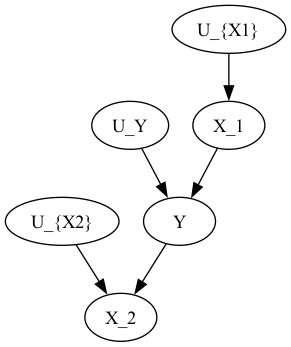

In [79]:
import graphviz as gr
from IPython.display import Image

# Create a DAG for the SCM with X1, X2, and Y
dag = gr.Digraph()

# Add nodes representing variables in the SCM
dag.node("X1", "X_1")
dag.node("X2", "X_2")
dag.node("Y", "Y")
dag.node("UX1", "U_{X1}")
dag.node("UY", "U_Y")
dag.node("UX2", "U_{X2}")

# Add edges representing the causal relationships
dag.edge("UX1", "X1")
dag.edge("X1", "Y")
dag.edge("UY", "Y")
dag.edge("Y", "X2")
dag.edge("UX2", "X2")

# Render and display the DAG in the notebook
dag.render('scm_example_dag', format='png')
Image(filename='scm_example_dag.png')


---

## Example of Interventions in SCMs: Kidney Stone Treatments

This example is based on a famous dataset comparing the success rates of two treatments for kidney stone removal. It presents a classic case of **Simpson's Paradox**, where the treatment choice appears contradictory depending on whether we consider the overall data or subgroups (patients with small vs. large stones). This example was used in many studies such as [Bottou et al., 2013](https://jmlr.org/papers/v14/bottou13a.html) and [Charig et al., 1986](https://www.ncbi.nlm.nih.gov/pmc/articles/PMC1339981/).

<img src="img/ch4/Kidney-stones-xray.png" width="500">

## Background

There are two major types of treatment for kidney stone removal:

- **Treatment $A$ (Open Surgery)**: Open surgery for kidney stone removal.
- **Treatment $B$ (Percutaneous nephrolithotomy)**: A less invasive procedure using a small puncture to remove kidney stones.

In the dataset:
- **700 patients** were treated, divided equally between the two treatments:
    - **350 patients** received Treatment $A$ (open surgery), with a **78% recovery rate**.
    - **350 patients** received Treatment $B$ (percutaneous nephrolithotomy), with an **83% recovery rate**.

<div style="color:blue">
<b>Which one seems better?
</div>


In [81]:
# Summary of the Recovery Rates
import pandas as pd

# Create a DataFrame to represent the table
data = {
    "Treatment": ["Open Surgery (A)", "Percutaneous nephrolithotomy (B)"],
    "Overall": ["78% (273/350)", "83% (289/350)"],
    "Patients with Small Stones": ["93% (81/87)", "87% (234/270)"],
    "Patients with Large Stones": ["73% (192/263)", "69% (55/80)"]
}

# Create the DataFrame
df = pd.DataFrame(data)

# Display the DataFrame as a table
df


,Treatment,Overall,Patients with Small Stones,Patients with Large Stones
0,Open Surgery (A),78% (273/350),93% (81/87),73% (192/263)
1,Percutaneous nephrolithotomy (B),83% (289/350),87% (234/270),69% (55/80)


At first glance, Treatment $B$ seems more effective based on the overall recovery rates. However, upon closer examination of the data, we observe Simpson's Paradox: when stratifying the patients by stone size (small vs. large stones), Treatment $A$ outperforms Treatment $B$ in both subgroups of patients.

## Simpson's Paradox and Intervention

Upon reviewing the data:

- **Patients with Small Stones**:
    - Treatment $A$: 93% recovery rate
    - Treatment $B$: 87% recovery rate
- **Patients with Large Stones**:
    - Treatment $A$: 73% recovery rate
    - Treatment $B$: 69% recovery rate

<div style="color:blue">
<b> Now, which one seems better?
</div>

</br>

While Treatment $B$ seems better overall, Treatment $A$ is actually better for both subgroups of patients. This paradox occurs because a larger proportion of patients with severe cases (large stones) were assigned to Treatment $A$, making its overall recovery rate appear worse.


## Using Interventions to Resolve the Paradox

We can use the language of **interventions** to better understand the effectiveness of each treatment. Instead of asking which treatment had the higher success rate in this particular study, we are interested in the success rates if we intervened and assigned **all patients** to Treatment $A$ or Treatment $B$. 

We want to compare the following intervention distributions:

- $P^{\mathfrak{C} ; do(T := A)}$: Force all patients to receive Treatment $A$.
- $P^{\mathfrak{C} ; do(T := B)}$: Force all patients to receive Treatment $B$.

<div style="color:blue">
<b> Can we do it in reality?
</div>

## Intervention Distributions and Calculations

We assume the true underlying SCM $\mathfrak{C}$ has the following structure:
- $Z$: Size of the stone (small or large).
- $T$: Treatment ($A$ or $B$).
- $R$: Recovery (success or failure).

The recovery ($R$) is influenced by both the treatment ($T$) and the size of the stone ($Z$), while the treatment itself may also depend on the stone size ($Z$). Here's the SCM as a DAG:



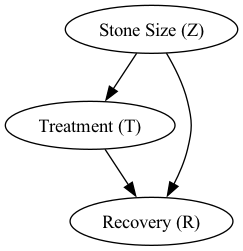

In [83]:
# DAG Representation for Kidney Stone Treatment Example
import graphviz as gr
from IPython.display import Image

# Create a DAG for the kidney stone treatment example
dag = gr.Digraph()

# Add nodes
dag.node("Z", "Stone Size (Z)")
dag.node("T", "Treatment (T)")
dag.node("R", "Recovery (R)")

# Add edges representing the causal relationships
dag.edge("Z", "T")
dag.edge("Z", "R")
dag.edge("T", "R")

# Render the DAG and display it
dag.render('kidney_treatment_dag', format='png')
Image(filename='kidney_treatment_dag.png')


## Intervention Calculation 

We can compute the intervention distributions $P^{\mathfrak{C} ; do(T := A)}$ (force all patients to receive Treatment $A$) and $P^{\mathfrak{C} ; do(T := B)}$ (force all patients to receive Treatment $B$) by using the following formula for Treatment $A$ intervention:

$$
\begin{aligned}
P^{\mathfrak{C}_{A}}(R=1) &=\sum_{z=0}^{1} P^{\mathfrak{C}_{A}}(R=1, T=A, Z=z) \\
&=\sum_{z=0}^{1} P^{\mathfrak{C}_{A}}(R=1 \mid T=A, Z=z) P^{\mathfrak{C}_{A}}(T=A, Z=z) \\
&=\sum_{z=0}^{1} P^{\mathfrak{C}_{A}}(R=1 \mid T=A, Z=z) P^{\mathfrak{C}_{A}}(Z=z) \\
&=\sum_{z=0}^{1} P^{\mathfrak{C}}(R=1 \mid T=A, Z=z) P^{\mathfrak{C}}(Z=z) .
\end{aligned}
$$

Given that we have observational data, we can estimate this using:

$$
P^{\mathfrak{C} ; d o(T:=A)}(R=1) = P^{\mathfrak{C}_{A}}(R=1) \approx 0.93 \cdot \frac{357}{700}+0.73 \cdot \frac{343}{700}=0.832
$$

Similarly, for Treatment $B$:

$$
P^{\mathfrak{C} ; d o(T:=B)}(R=1) = P^{\mathfrak{C}_{B}}(R=1) \approx 0.87 \cdot \frac{357}{700}+0.69 \cdot \frac{343}{700} \approx 0.782
$$

* From this, we conclude that Treatment $A$ would result in a higher recovery rate for the entire population under the intervention, even though it seems worse based on the overall observational data. 
This highlights the difference between **intervening** and **conditioning**, a crucial insight into understanding Simpson's Paradox.


## Conclusion

In this example, by using interventions, we avoid the misleading conclusion suggested by Simpson's Paradox. This shows the importance of considering **causal relationships** and how they can affect treatment decisions. Intervening to force all patients to receive one treatment allows us to make more accurate decisions about which treatment is better in the long run.


---

## 5. Counterfactuals in SCMs

In **Structural Causal Models (SCMs)**, counterfactuals allow us to answer hypothetical **"what if"** questions. These questions help us determine how an outcome would have changed if a specific variable had been different. For example, *“What would the company's revenue have been if the marketing investment had been higher?”*

Counterfactuals allow us to explore alternative scenarios or "worlds" that differ from reality. In essence, they answer the question: *"How would the world change if we had done things differently?"*

For example, in a company’s marketing strategy, we might ask: *"What if we had spent more money on marketing?"* By answering this question, we can understand how the company's revenue would have changed under a different set of circumstances.


A **counterfactual** in an SCM is created by first updating the latent (or noise) variables using the observed data and then performing an intervention to determine how the outcome would change.

>#### **Definition 4.2: Counterfactuals in SCMs**:
> Given an SCM $\mathfrak{C} = (\mathbf{S}, P_U)$ over variables $\mathbf{X}$ and some observed data $\mathbf{x}$, a **counterfactual SCM** is created by first conditioning the noise or latent variables on the observed data $\mathbf{X} = \mathbf{x}$, and then intervening on the system to change the values of certain variables. Formally, this is written as:
>
>$$
\mathfrak{C}_{\mathbf{X} = \mathbf{x}} := \left( \mathbf{S}, P_{\mathbf{U}}^{\mathfrak{C} \mid \mathbf{X} = \mathbf{x}} \right)
$$
>
>Where:
>
>$$
P_{\mathbf{U}}^{\mathfrak{C} \mid \mathbf{X} = \mathbf{x}} = P_{\mathbf{U} \mid \mathbf{X} = \mathbf{x}}
$$

This simply means that **counterfactuals** are calculated in two steps:
1. **Condition**: We adjust the latent variables (represented as $U$) to be consistent with the observed data.
2. **Intervene**: After conditioning on the observed data, we intervene on certain variables to change their values and assess the new outcome.

### 5.1. Connecting Counterfactuals to the do-operator

In simpler terms, **counterfactual statements** can be viewed as **do-statements** applied to a modified SCM that has already been conditioned on the observed data. For instance, if we know how much marketing spending occurred in the real world, we can imagine intervening to set a different spending level and then predict the company's revenue under this new condition.

### 5.2. Abduction-Action-Prediction (AAP) Process for Counterfactuals

The steps for computing a counterfactual in SCMs follow the **Abduction-Action-Prediction** (AAP) process:

1. **Abduction**: Use the observed data to infer the latent noise variables (unobserved factors).
2. **Action**: Perform an intervention on the SCM by modifying the structural equation for the variable of interest.
3. **Prediction**: Compute the new outcome by using the modified SCM and the inferred latent variables.

---

### Example of Counterfactuals: SCM for Marketing, Revenue, and Market Share

Consider a system with three variables:
- $X_1$: Marketing investment (in millions of dollars).
- $Y$: Company revenue (in millions of dollars).
- $X_2$: Market share (as a percentage).

The relationships between these variables are modeled as follows:

$$
\begin{cases}
X_1 = U_{X_1} \\
Y = 2X_1 + U_Y \\
X_2 = Y + U_{X_2}
\end{cases}
$$

Where $U_{X_1}$, $U_Y$, and $U_{X_2}$ are independent noise terms drawn from normal distributions.

#### DAG Representation

To represent the causal relationships in this system, we can use a Directed Acyclic Graph (DAG):

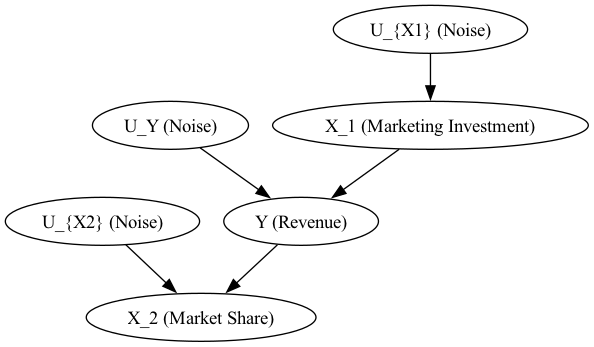

In [86]:
import graphviz as gr
from IPython.display import Image

# Create a DAG for the probabilistic SCM with X1, X2, and Y
dag = gr.Digraph()

# Add nodes
dag.node("X1", "X_1 (Marketing Investment)")
dag.node("Y", "Y (Revenue)")
dag.node("X2", "X_2 (Market Share)")
dag.node("UX1", "U_{X1} (Noise)")
dag.node("UY", "U_Y (Noise)")
dag.node("UX2", "U_{X2} (Noise)")

# Add edges representing the causal relationships
dag.edge("UX1", "X1")
dag.edge("X1", "Y")
dag.edge("UY", "Y")
dag.edge("Y", "X2")
dag.edge("UX2", "X2")

# Render and display the DAG in the notebook
dag.render('counterfactual_dag', format='png')
Image(filename='counterfactual_dag.png')

#### Abduction-Action-Prediction (AAP) Steps for Counterfactuals

The **Abduction-Action-Prediction (AAP)** process is a systematic approach to compute counterfactuals in SCMs. Let’s break down each of the steps for our example.


#### **Step 1: Abduction**

In the **abduction** step, we observe real-world data and use it to infer the latent variables (or noise terms) in the system.

For our SCM, the structural equations are:

$$
\begin{cases}
X_1 = U_{X_1} \\
Y = 2X_1 + U_Y \\
X_2 = Y + U_{X_2}
\end{cases}
$$

Given observed values for $X_1$, $Y$, and $X_2$, we can **abduce** (infer) the noise terms:

- For $X_1$, the noise term is $U_{X_1} = X_1$ (since $X_1$ is directly defined as $U_{X_1}$).
- For $Y$, we can solve for $U_Y$ using the equation $Y = 2X_1 + U_Y$. Thus, the noise term is:

$$
U_Y = Y - 2X_1
$$

- For $X_2$, we can solve for $U_{X_2}$ using the equation $X_2 = Y + U_{X_2}$. Thus, the noise term is:

$$
U_{X_2} = X_2 - Y
$$

This step conditions the SCM on the observed data, updating the noise terms accordingly.


#### **Step 2: Action**

In the **action** step, we intervene on the system. An intervention is represented by a **do-operation** where we set the value of a variable to a specific value, breaking any causal influences on that variable.

In our example, we intervene on $X_1$ (Marketing investment), setting its value to twice its original value:

$$
do(X_1 := 2X_1)
$$

This changes the structural equation for $X_1$ but leaves the other equations in the system intact.



#### **Step 3: Prediction**

In the **prediction** step, we use the modified SCM (after the intervention) to compute the new outcomes for the system.

After the intervention, we compute the new values for $Y$ and $X_2$ using the modified $X_1$. The updated equations are:

- For $Y$:

$$
Y_{\text{cf}} = 2X_1 + U_Y
$$

where $U_Y$ is the noise term inferred during the **abduction** step.

- For $X_2$:

$$
X_{2_{\text{cf}}} = Y_{\text{cf}} + U_{X_2}
$$

where $U_{X_2}$ is also inferred during the **abduction** step.

The subscript $cf$ used in the prediction step stands for counterfactual. It indicates the value of a variable after an intervention has been performed.


#### Summary of AAP Steps:
1. **Abduction**: Use observed data to infer noise terms ($U_{X_1}$, $U_Y$, $U_{X_2}$).
2. **Action**: Perform an intervention by setting $X_1$ to a new value.
3. **Prediction**: Calculate the new counterfactual outcomes ($Y$ and $X_2$) using the modified SCM.



#### Simulation of Observed Data

We now simulate data based on the SCM defined above. Each variable will be continuous, and we will add random noise to make the model probabilistic. After generating the observed data, we will perform a counterfactual intervention by modifying $X_1$.

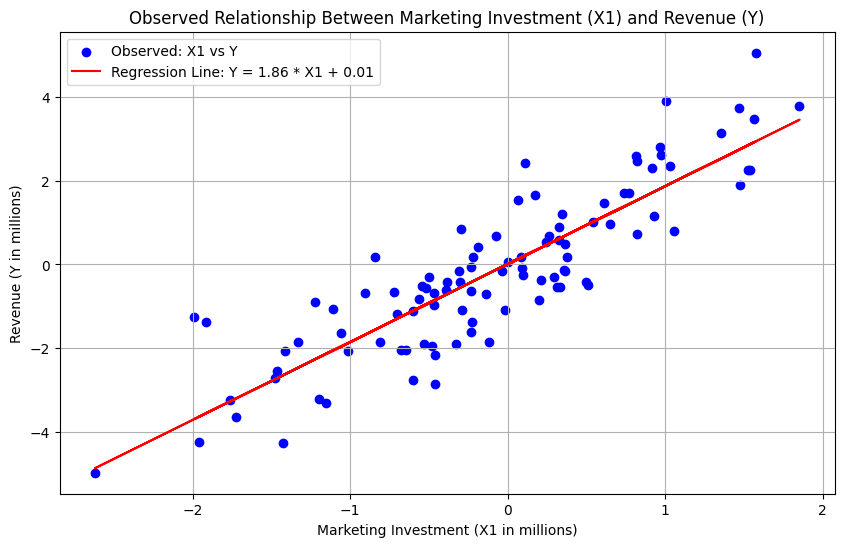

In [89]:
import numpy as np
import matplotlib.pyplot as plt

# Set random seed for reproducibility
np.random.seed(42)

# Number of data points
n = 100

# Generate noise terms (normally distributed)
U_X1 = np.random.normal(0, 1, n)  # Noise for X1
U_Y = np.random.normal(0, 1, n)   # Noise for Y
U_X2 = np.random.normal(0, 1, n)  # Noise for X2

# Generate X1 (investment), Y (revenue), and X2 (market share)
X1 = U_X1  # Investment in marketing
Y = 2 * X1 + U_Y  # Revenue
X2 = Y + U_X2  # Market share

# Perform a linear regression (fit a line to the data)
slope, intercept = np.polyfit(X1, Y, 1)  # Linear fit (degree 1)

# Generate points for the regression line
Y_pred = slope * X1 + intercept

# Plot observed relationships (before intervention)
plt.figure(figsize=(10, 6))
plt.scatter(X1, Y, label="Observed: X1 vs Y", color="blue")

# Plot the regression line
plt.plot(X1, Y_pred, color="red", label=f"Regression Line: Y = {slope:.2f} * X1 + {intercept:.2f}")

# Customize the plot
plt.title("Observed Relationship Between Marketing Investment (X1) and Revenue (Y)")
plt.xlabel("Marketing Investment (X1 in millions)")
plt.ylabel("Revenue (Y in millions)")
plt.grid(True)
plt.legend()
plt.show()


#### Counterfactual Intervention: Doubling Marketing Investment

We now intervene on $X_1$ by doubling its value to compute the counterfactual outcome. Specifically, we ask: "What would the company's revenue and market share have been if the marketing investment had been doubled?"

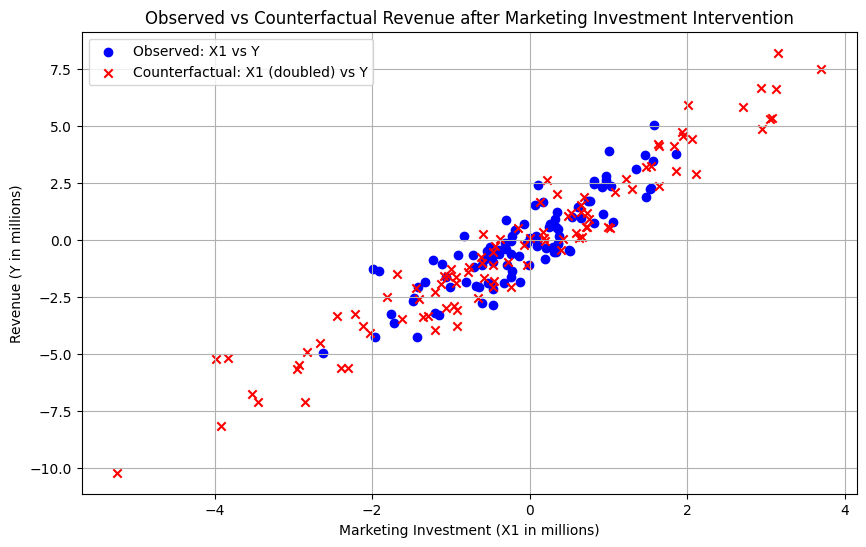

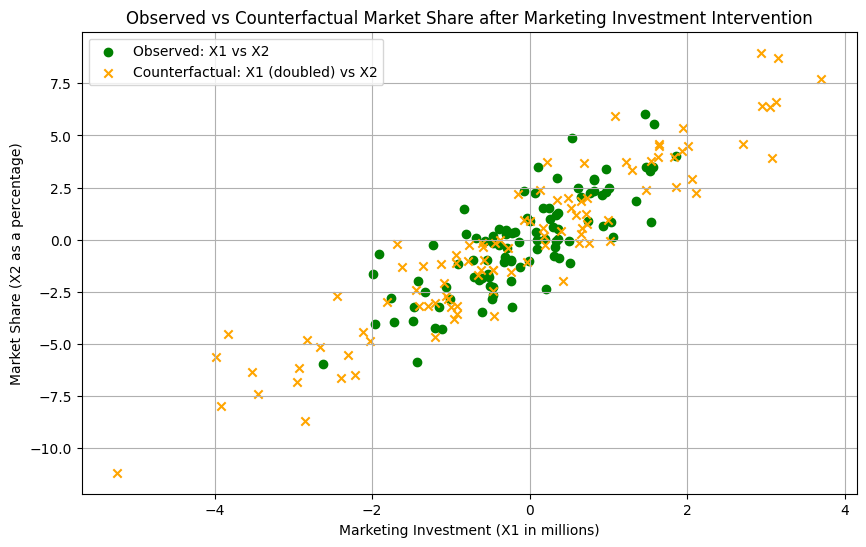

In [91]:
# Perform intervention on X1 by doubling its value
X1_cf = 2 * X1  # Counterfactual: X1 doubled
Y_cf = 2 * X1_cf + U_Y  # New revenue under the intervention
X2_cf = Y_cf + U_X2  # New market share under the intervention

# Plot counterfactual vs observed results
plt.figure(figsize=(10, 6))
plt.scatter(X1, Y, label="Observed: X1 vs Y", color="blue")
plt.scatter(X1_cf, Y_cf, label="Counterfactual: X1 (doubled) vs Y", color="red", marker='x')
plt.title("Observed vs Counterfactual Revenue after Marketing Investment Intervention")
plt.xlabel("Marketing Investment (X1 in millions)")
plt.ylabel("Revenue (Y in millions)")
plt.grid(True)
plt.legend()
plt.show()

# Plot counterfactual market share results
plt.figure(figsize=(10, 6))
plt.scatter(X1, X2, label="Observed: X1 vs X2", color="green")
plt.scatter(X1_cf, X2_cf, label="Counterfactual: X1 (doubled) vs X2", color="orange", marker='x')
plt.title("Observed vs Counterfactual Market Share after Marketing Investment Intervention")
plt.xlabel("Marketing Investment (X1 in millions)")
plt.ylabel("Market Share (X2 as a percentage)")
plt.grid(True)
plt.legend()
plt.show()


#### Interpretation of Results:

* **Observed Data**: The scatter plot shows the relationship between marketing investment ($X_1$) and revenue ($Y$), and between revenue ($Y$) and market share ($X_2$). The blue points represent the observed data, where noise is added to both $Y$ and $X_2$.

* **Counterfactual Results**: After doubling the marketing investment ($X_1$), the red points show the counterfactual revenue ($Y$), and the orange points show the counterfactual market share ($X_2$). The intervention causes both the revenue and market share to increase, as expected from the model.



---

# Build a Structural Causal Model Step-by-Step

## Impact of Beer Consumption on Students Happiness at Kronbar

In this example, we aim to investigate the **causal effect of beer consumption on happiness** among students at **[Kronbar](https://www.kronbar.no/media)**, the campus bar at Western Norway University of Applied Sciences, Beregn. Specifically, we estimate the **average treatment effect (ATE)** of beer consumption on happiness. To make the example more realistic, we introduce a new variable, *family background*, which influences both personality and financial situation.


<div style="color:blue">
<b> What do you think?
</div>

    
<img src="img/ch5/kronbar.jpg" alt="drawing" width="500"/>


### What is ATE?

The **Average Treatment Effect (ATE)** is a core concept in causal inference. It measures the **average difference in outcomes** (e.g., happiness) if the entire population receives the treatment versus if the entire population does not. Here, ATE quantifies the difference in the **average happiness** if all students drank beer versus if none of them did.

---

### Step 1: Identify Variables and Assumptions

We start by identifying the **observed variables** and **latent variables** that are relevant to the system. With the addition of **family background**, we define the following variables:

- **Observed Variables**:
    - $W_1$: A student's **pre-existing personality/sociality** (influenced by family background).
    - $W_2$: A student's **financial situation** (whether they can afford beer, also influenced by family background).
    - $A$: A **binary variable** indicating **beer consumption** ($A=1$ if the student drinks beer, $A=0$ otherwise).
    - $Y$: The student's **happiness level** (the outcome).

- **Latent (Unobserved) Variables**:
    - $F$: **Family background** (a latent factor influencing both personality and financial situation).
    - $U_{W1}$, $U_{W2}$, $U_A$, $U_Y$: Additional noise terms that affect $W_1$, $W_2$, $A$, and $Y$.


---

### Step 2: Create a DAG (Directed Acyclic Graph)

We use a DAG to represent the causal relationships between the variables, including the influence of family background ($F$) on both personality ($W_1$) and financial situation ($W_2$).

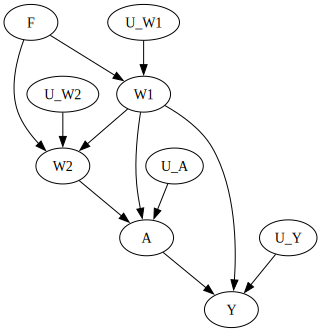

In [95]:
# Step 2: Create a DAG (Directed Acyclic Graph)
import graphviz as gr

g = gr.Digraph()
g.edge("F", "W1")
g.edge("F", "W2")
g.edge("U_W1", "W1")
g.edge("U_W2", "W2")
g.edge("U_A", "A")
g.edge("U_Y", "Y")

g.edge("W1", "W2")
g.edge("W1", "A")
g.edge("W2", "A")
g.edge("W1", "Y")
g.edge("A", "Y")

# Render the DAG for viewing
g.render('kronbar_scm_dag', format='png', cleanup=True)
g


---

### Step 3: Create a Structural Causal Model (SCM)

We can now create the **SCM** based on the DAG. The SCM consists of structural equations that represent how each variable is generated, influenced by other variables and latent factors.

#### Observed Variables:
$X = (W_1, W_2, A, Y)$

#### Latent Variables:
$U = (F, U_{W1}, U_{W2}, U_A, U_Y)$

#### Structural Equations:
$$
\mathfrak{C} :=
\begin{cases}
    F \sim Normal(\mu_F, \sigma_F^2) \\
    W_1 = f_{W1}(F, U_{W1}) \\
    W_2 = f_{W2}(F, W_1, U_{W2}) \\ 
    A = f_A(W_1, W_2, U_A) \\
    Y = f_Y(W_1, A, U_Y) 
\end{cases}
$$


---

### Step 4: Assume the Form of the Structural Equations and Latent Variables

We will now assign specific distributions to the latent variables and structural equations based on **expert consultation**, **literature review**, and **similar studies**.

#### Latent Variables' Distributions:

In this SCM, the distributions of exogenous (latent) variables are chosen to reflect reasonable assumptions about unobserved influences on each endogenous variable. Below is a brief rationale for each:

$$
\begin{cases}
    F \sim Normal(0, 1) \quad \text{(family background)} \\
    U_{W1} \sim Uniform(0, 1) \\
    U_{W2} \sim Bernoulli(0.5) \\
    U_A \sim Normal(-3, 1) \\
    U_Y \sim Normal(0, 0.3)
\end{cases}
$$


- $F$ (family background) influences both personality and financial situation.
- $U_{W1}$, $U_{W2}$ represent unobserved variability in personality and financial situation.
- $U_A$ and $U_Y$ capture other random factors that influence beer consumption and happiness.



In this SCM, the distributions of exogenous (latent) variables are chosen to reflect reasonable assumptions about unobserved influences on each endogenous variable. Below is a brief rationale for each:

- **$F \sim \mathcal{N}(0, 1)$**  
  $F$ represents *family background*, modeled as a standard normal distribution. This assumes a symmetric spread around a neutral mean, capturing latent social and cultural factors that vary across individuals without introducing skewness.

- **$U_{W1} \sim \text{Uniform}(0, 1)$**  
  The noise term $U_{W1}$ captures unobserved heterogeneity in *personality/sociality*. A uniform distribution reflects maximum entropy, suggesting we have no prior knowledge about the direction or likelihood of influence across the $[0, 1]$ interval.

- **$U_{W2} \sim \text{Bernoulli}(0.5)$**  
  This binary noise term introduces randomness in the *financial situation* variable. A Bernoulli(0.5) distribution reflects a fair coin flip—e.g., whether a student has a binary status like receiving financial support.

- **$U_A \sim \mathcal{N}(-3, 1)$**  
  The latent noise for *beer consumption* ($A$) is centered at $-3$, introducing a systematic bias against consumption (e.g., due to social stigma or regulation). The normal distribution maintains continuous variability while favoring lower likelihoods of treatment activation.

- **$U_Y \sim \mathcal{N}(0, 0.3)$**  
  A low-variance normal distribution reflects small, random fluctuations in *happiness* ($Y$) that are not explained by the structural model. The small variance ($0.3$) indicates that most of the outcome variability is captured by the causal pathways.

These distributions allow for simulation of realistic latent dynamics while maintaining tractability for analytical and computational purposes.



#### Structural Equations:
$$
\mathfrak{C} :=
\begin{cases}
    W_1 = \mathbb{I}[F + U_{W1} < 0.6] \\
    W_2 = W_1 + F + 2U_{W2} \\ 
    A = \mathbb{I}[(1 + W_1 + 2W_2 + U_A) > 0] \\
    Y = 1 + 2.5A + 3W_1 - 0.25A \cdot W_1 + U_Y
\end{cases}
$$


#### Clarification: The Indicator Function $\mathbb{I}$

In the structural equations, you may have noticed the use of the function $\mathbb{I}$. This is known as the **indicator function**, and it is used to assign binary values (1 or 0) based on whether a condition is true or false. 

The indicator function $\mathbb{I}[\text{condition}]$ works as follows:

$
\mathbb{I}[\text{condition}] =
\begin{cases}
1 & \text{if the condition is true}, \\
0 & \text{if the condition is false}.
\end{cases}
$


Let’s consider the following equation from the model:

$
W_1 = \mathbb{I}[F + U_{W1} < 0.6]
$

In this equation:
- $W_1 = 1$ if $F + U_{W1} < 0.6$
- $W_1 = 0$ if $F + U_{W1} \geq 0.6$

Here, $F$ is the latent variable representing **family background**, and $U_{W1}$ is a noise term. The indicator function helps us categorize students into two groups based on their combined family background and noise: those who are more likely to have a social personality ($W_1 = 1$) and those who are not ($W_1 = 0$).

This binary variable $W_1$ is then used to model the student's personality or sociality, which further influences other variables in the system, such as beer consumption and happiness.

The indicator function is useful in causal models when we need to represent binary decisions or outcomes based on certain conditions.


---

### Step 5: Specify the Causal Question

The causal question we want to answer is: **Does beer consumption increase student happiness?**

Since we cannot observe both **potential outcomes** (drinking vs. not drinking beer) for the same student at the same time, we use the **Average Treatment Effect (ATE)** to answer this question. The ATE is defined as the difference in expected happiness when all students drink beer versus when none do:

$$
ATE = \mathbb{E}[Y(A=1)] - \mathbb{E}[Y(A=0)]
$$

**ATE (Average Treatment Effect)** measures the difference in the expected outcome (in this case, happiness) between two scenarios:

* **Treatment group:** where all students drink beer ($A=1$).
* **Control group:** where no students drink beer ($A=0$).
 
The ATE helps us quantify the causal effect of beer consumption on happiness across the population.


---

### Step 6: Simulate Data in Python

We now simulate data for 5000 students based on the SCM we constructed.

In [100]:
# Step 6: Simulate Data in Python

import numpy as np
import pandas as pd

# Set random seed for reproducibility
seed = 42
np.random.seed(seed)

n_students = 5000

# Simulate latent variables (family background and noise)
F = np.random.normal(0, 1, n_students)
Uw1 = np.random.uniform(0, 1, n_students)
Uw2 = np.random.binomial(1, 0.5, n_students)
Ua = np.random.normal(-3, 1, n_students)
Uy = np.random.normal(0, 0.3, n_students)

# Endogenous variables
W1 = (F + Uw1 < 0.6).astype(int)
W2 = W1 + F + 2 * Uw2
A = ((1 + W1 + 2 * W2 + Ua) > 0).astype(int)
Y = 1 + 2.5 * A + 3 * W1 - 0.25 * A * W1 + Uy

# Store data in a dataframe
data = pd.DataFrame({'F': F, 'W1': W1, 'W2': W2, 'A': A, 'Y': Y})
data.head()


,F,W1,W2,A,Y
0,0.496714,0,0.496714,0,0.241599
1,-0.138264,1,0.861736,0,3.749742
2,0.647689,0,2.647689,1,3.409074
3,1.523030,0,1.523030,1,3.638098
4,-0.234153,1,0.765847,1,5.754894


---

### Step 7: Counterfactual Analysis

In causal inference, **counterfactual analysis** helps us explore what would have happened if a student had acted differently. Here, we generate the **counterfactual outcomes** $Y_0$ (happiness if no beer is consumed) and $Y_1$ (happiness if beer is consumed).

#### Counterfactual Equations:
- For beer consumption ($A=1$): 
$$
Y_1 = 1 + 2.5 \cdot 1 + 3W_1 - 0.25 \cdot 1 \cdot W_1 + U_Y
$$
- For no beer consumption ($A=0$): 
$$
Y_0 = 1 + 2.5 \cdot 0 + 3W_1 - 0.25 \cdot 0 \cdot W_1 + U_Y
$$

This allows us to calculate the **causal effect** of beer consumption on happiness for each individual student, and we can compute the **ATE** to quantify this effect across all students.


In [102]:
# Counterfactual outcomes
Y1 = 1 + 2.5 * 1 + 3 * W1 - 0.25 * 1 * W1 + Uy  # Happiness if A=1
Y0 = 1 + 2.5 * 0 + 3 * W1 - 0.25 * 0 * W1 + Uy  # Happiness if A=0

# Store the counterfactuals
data['Y1'] = Y1
data['Y0'] = Y0

# Calculate the Average Treatment Effect (ATE)
ATE = (data['Y1'] - data['Y0']).mean()
ATE


2.36625

---

### Interpretation of ATE:

In our case, an ATE of 2.37 means that, on average, students who drink beer at Kronbar experience a happiness increase of 2.37 units compared to students who do not drink beer.

* **Positive ATE:** A positive value of ATE indicates that beer consumption has a positive causal effect on happiness. Students who drink beer are, on average, happier than those who do not.
* **Magnitude of ATE** The magnitude of ATE tells us how much happier students are after drinking beer. In this case, students who drink beer are, on average, 2.37 happiness points happier compared to those who do not.



**BTW, this is just a made-up story.  Always drink responsibly! :-)**

## References

The content of this chapter draws inspiration from the [Elements of Causal Inference](https://mitpress.mit.edu/books/elements-causal-inference) (Open Access) book by Jonas Peters, Dominik Janzing, and Bernhard Schölkopf.

The beer consumption example is adapted from the [Introduction to Causal Inference](https://www.ucbbiostat.com) course by Maya L. Petersen and Laura B. Balzer, University of California, Berkeley.

